In [10]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [11]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    strike_rate: float
    balls_per_boundary: float
    boundary_percentage: float
    summary: str

In [12]:
def calculate_strike_rate(state: BatsmanState):
    strike_rate = state['runs'] / state['balls'] * 100
    return {'strike_rate':strike_rate}
    # return state # we can't return entire state object for parallel workflow 


In [13]:
def calculate_balls_per_boundary(state: BatsmanState):
    balls_per_boundary = state['balls'] / (state['fours'] + state['sixes'])
    return {'balls_per_boundary':balls_per_boundary}

In [14]:
def calculate_boundary_percentage(state: BatsmanState):
    boundary_percentage = (state['fours'] + state['sixes']) / state['balls'] * 100
    return {'boundary_percentage':boundary_percentage}

In [15]:
def generate_summary(state: BatsmanState):
    summary = f"""
    Total runs: {state['runs']}
    Strike rate: {state['strike_rate']:.2f}
    Balls per boundary: {state['balls_per_boundary']:.2f}
    Boundary percentage: {state['boundary_percentage']:.2f}
    """
    return {"summary": summary}

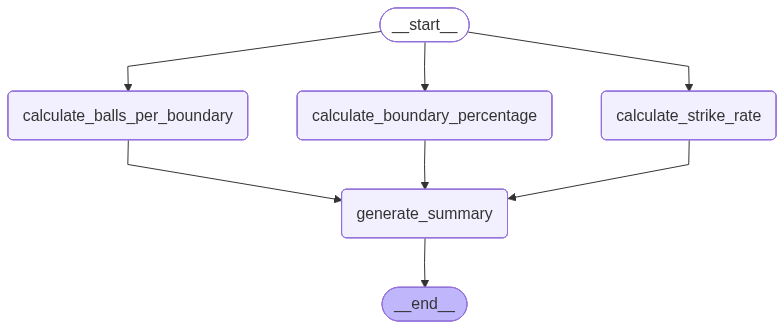

In [16]:
graph = StateGraph(BatsmanState)

graph.add_node("calculate_strike_rate", calculate_strike_rate)
graph.add_node("calculate_balls_per_boundary", calculate_balls_per_boundary)
graph.add_node("calculate_boundary_percentage", calculate_boundary_percentage)
graph.add_node("generate_summary", generate_summary)

graph.add_edge(START, "calculate_strike_rate")
graph.add_edge(START, "calculate_balls_per_boundary")
graph.add_edge(START, "calculate_boundary_percentage")

graph.add_edge("calculate_strike_rate", "generate_summary")
graph.add_edge("calculate_balls_per_boundary", "generate_summary")
graph.add_edge("calculate_boundary_percentage", "generate_summary")

graph.add_edge("generate_summary", END)

workflow = graph.compile()
workflow

In [18]:
initial_state = {
    "runs": 150,
    "balls": 100,
    "fours": 20,
    "sixes": 5
}

final_state=workflow.invoke(initial_state)
final_state

{'runs': 150,
 'balls': 100,
 'fours': 20,
 'sixes': 5,
 'strike_rate': 150.0,
 'balls_per_boundary': 4.0,
 'boundary_percentage': 25.0,
 'summary': '\n    Total runs: 150\n    Strike rate: 150.00\n    Balls per boundary: 4.00\n    Boundary percentage: 25.00\n    '}